# Importing libraries

In [13]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings(action='ignore')

# nltk
import nltk
nltk.download('stopwords')

## Preprocessing libraries
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# For Model training
from scipy.stats import uniform                 # Used to sample hyperparameter values from a continuous range.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC              # a variant of SVC optimized for large datasets

# Metrics for accuracy
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Accessing the dataset
dataset_path = "/content/drive/MyDrive/tweet/tweet.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading our Dataset
## Dataset details
- target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

In [3]:
columns=["target", "ids", "date", "flag", "user", "text"]
df_read=pd.read_csv(dataset_path,encoding='latin1',names=columns)
print(df_read.shape)
df_read.head()

(1600000, 6)


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Making a DataFrame out of the above Dataset with the only columns that are needed

In [4]:
data={'text':df_read['text'].values,'target':df_read['target'].values}
df=pd.DataFrame(data)
df.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


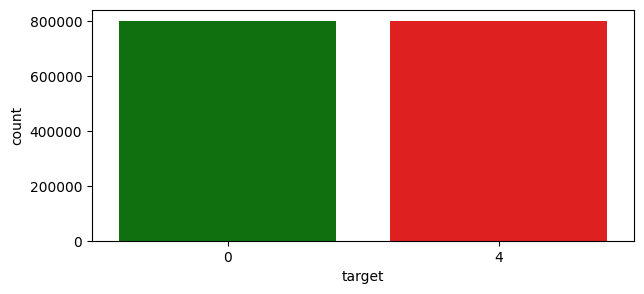

In [5]:
# Seeing the distribution of positive and negative tweet reviews in target column
plt.figure(figsize=(7,3))
sns.countplot(data=df,x='target',palette=['green','red'])
plt.show()

In [6]:
# Data clearing and preprocessing
corpus = []
ps=PorterStemmer()
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])         # Removing special characters from text(message)
    review = review.lower()                                  # Converting entire text into lower case
    review = review.split()                                  # Splitting our text into words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]             # Stemming and removing stopwords
    review = ' '.join(review)                                # Joining all the words into a comple text
    corpus.append(review)                                    # Appending each text into the list corpus

In [7]:
# Creating the Bag of Words model
cv = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

In [8]:
# We will use X as independent feature section
X = cv.fit_transform(corpus)
# We will use y as dependent feature section
y=df['target']

In [10]:
print('No. of feature_words: ', len(cv.get_feature_names_out()))

No. of feature_words:  500000


In [11]:
# Creating a pickle file for the TfidfVectorizer
with open('cv-transform.pkl', 'wb') as f:
    pickle.dump(cv, f)

## Model Training

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [14]:
model1=LogisticRegression()
model2=BernoulliNB()
model3=LinearSVC()
model=[model1, model2, model3]

In [15]:
i = 0
for algo in model:
  i += 1
  print("M-O-D-E-L :",i)
  algo.fit(X_train, y_train)
  y_pred=algo.predict(X_test)
  # Checking the accuracy
  print("Confusion matrix : \n",confusion_matrix(y_pred,y_test))
  print("Accuracy score : ",accuracy_score(y_pred,y_test))
  print("Classification Report : \n",classification_report(y_pred,y_test))
  print("-----------------------------------------------------------\n")

M-O-D-E-L : 1
Confusion matrix : 
 [[184653  45509]
 [ 55224 194614]]
Accuracy score :  0.7901395833333333
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79    230162
           4       0.81      0.78      0.79    249838

    accuracy                           0.79    480000
   macro avg       0.79      0.79      0.79    480000
weighted avg       0.79      0.79      0.79    480000

-----------------------------------------------------------

M-O-D-E-L : 2
Confusion matrix : 
 [[184427  52712]
 [ 55450 187411]]
Accuracy score :  0.7746625
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.78      0.77    237139
           4       0.78      0.77      0.78    242861

    accuracy                           0.77    480000
   macro avg       0.77      0.77      0.77    480000
weighted avg       0.77      0.77      0.77    480000

----------------------------

NOTE :- Model1 is performing the best i.e. Logistic Regression

## Doing Hyperparameter Tuning for Logistic Regression

In [23]:
# Define the hyperparameters to be tuned and their search ranges
param_dist = {'C': uniform(0.1, 1.0),
              'penalty': ['l2'],
              'solver': ['liblinear', 'saga']}

In [24]:
LogisticRegression = RandomizedSearchCV(estimator=model1,param_distributions=param_dist,n_iter=10, cv=5, n_jobs=-1, scoring='accuracy')
LogisticRegression.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f31aaab3f70>,
                                        'penalty': ['l2'],
                                        'solver': ['liblinear', 'saga']},
                   scoring='accuracy')

In [25]:
# Print the best parameters and score
print("Best parameters: ", LogisticRegression.best_params_)
print("Best score: ", LogisticRegression.best_score_)

Best parameters:  {'C': 0.9888051677181731, 'penalty': 'l2', 'solver': 'liblinear'}
Best score:  0.7886482142857143


In [26]:
# Training model using Naive bayes classifier
y_pred=LogisticRegression.predict(X_test)

In [27]:
# Checking the accuracy
print("Confusion matrix : \n",confusion_matrix(y_pred,y_test))
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("Classification Report : \n",classification_report(y_pred,y_test))

Confusion matrix : 
 [[184514  44985]
 [ 55363 195138]]
Accuracy score :  0.7909416666666667
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79    229499
           4       0.81      0.78      0.80    250501

    accuracy                           0.79    480000
   macro avg       0.79      0.79      0.79    480000
weighted avg       0.79      0.79      0.79    480000



In [28]:
# Creating a pickle file for the Logistic Regression model
with open("tweetmodel.pkl","wb") as file:
  pickle.dump(LogisticRegression,file)